# Testing OpenQASM3 to Quantikz Translator

This notebook demonstrates the OpenQASM3 to quantikz translator functionality in the qsip package.

In [1]:
# Import the translator
from qsip.translators import print_tex
import os
os.environ['PATH'] = '/Library/TeX/texbin:' + os.environ.get('PATH', '')

## Example 1: Bell State Circuit

In [2]:
# Bell state preparation circuit
bell_circuit = """
OPENQASM 3.0;
include "stdgates.inc";

qubit[2] q;
bit[2] c;

// Create Bell state
h q[0];
cx q[0], q[1];

// Measure
c[0] = measure q[0];
c[1] = measure q[1];
"""

# Get LaTeX code
latex_code = print_tex(bell_circuit, save_fig=True,latex=True)
print("Generated LaTeX code:", latex_code)

Generated LaTeX code: \begin{quantikz}
    \lstick{$|q[0]\rangle$} & \gate{H} & \ctrl{1} & \meter{} & \setwiretype{c} & \qw & \qw & \qw \\
    \lstick{$|q[1]\rangle$} & \qw & \targ{} & \qw & \qw & \meter{} & \setwiretype{c} & \qw
\end{quantikz}


## Example 2: GHZ State

GHZ State Circuit:


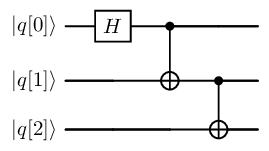

In [3]:
# GHZ state preparation
ghz_circuit = """
OPENQASM 3.0;
include "stdgates.inc";

qubit[3] q;

// Create GHZ state
h q[0];
cx q[0], q[1];
cx q[1], q[2];
"""

print("GHZ State Circuit:")
print_tex(ghz_circuit)

## Example 3: Quantum Teleportation

In [4]:
# Quantum teleportation circuit
teleport_circuit = """
OPENQASM 3.0;
include "stdgates.inc";

qubit[3] q;
bit[2] c;

// Create entangled pair between Alice and Bob
h q[1];
cx q[1], q[2];

// Alice performs Bell measurement
cx q[0], q[1];
h q[0];
c[0] = measure q[0];
c[1] = measure q[1];

// Bob's corrections (classical control not shown)
if (c[1]) x q[2];
if (c[0]) z q[2];
"""

print("Quantum Teleportation Circuit:")
print(print_tex(teleport_circuit, latex=True))

Quantum Teleportation Circuit:
\begin{quantikz}
    \lstick{$|q[0]\rangle$} & \qw & \qw & \ctrl{1} & \gate{H} & \meter{}\wire[d][2]{c} & \setwiretype{c} & \qw & \qw & \qw \\
    \lstick{$|q[1]\rangle$} & \gate{H} & \ctrl{1} & \targ{} & \qw & \qw & \qw & \meter{}\wire[d][1]{c} & \setwiretype{c} & \qw \\
    \lstick{$|q[2]\rangle$} & \qw & \targ{} & \qw & \qw & \gate{Z} & \qw & \gate{X} & \qw & \qw
\end{quantikz}


## Example 4: Parameterized Rotation Gates

Rotation Gates Circuit:
Circuit saved to rotation_circuit.pdf


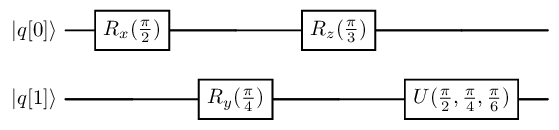

In [5]:
# Circuit with rotation gates
rotation_circuit = """
OPENQASM 3.0;
include "stdgates.inc";

qubit[2] q;

// Apply various rotation gates
rx(pi/2) q[0];
ry(pi/4) q[1];
rz(pi/3) q[0];

// U gate with parameters
u(pi/2, pi/4, pi/6) q[1];
"""

print("Rotation Gates Circuit:")
print_tex(rotation_circuit, save_fig=True)

## Example 5: Multi-Qubit Gates and Barriers

In [6]:
# Complex circuit with various gates
complex_circuit = """
OPENQASM 3.0;
include "stdgates.inc";

qubit[4] q;

// Single-qubit gates
h q[0];
x q[1];
y q[2];
z q[3];

// Two-qubit gates
cx q[0], q[2];
cy q[1], q[3];
swap q[0], q[1];

// Barrier
barrier q;

// Three-qubit gate
ccx q[0], q[1], q[2];

// Phase gates
s q[0];
t q[1];
sdg q[2];
tdg q[3];
"""

print("Complex Circuit:")
print_tex(complex_circuit)

Complex Circuit:
LaTeX compilation failed:
/texlive/2025/texmf-dist/tex/context/base/mkii/supp-pdf.mkii
[Loading MPS to PDF converter (version 2006.09.02).]
) (/usr/local/texlive/2025/texmf-dist/tex/latex/epstopdf-pkg/epstopdf-base.sty
(/usr/local/texlive/2025/texmf-dist/tex/latex/latexconfig/epstopdf-sys.cfg))
! Undefined control sequence.
<recently read> \barrier 
                         
l.11 \end
         {quantikz}

[1
Non-PDF special ignored!
<special> papersize=409.69168pt,115.99171pt
{/usr/local/texlive/2025/texmf-var/fonts/map/pdftex/updmap/pdftex.map}]
(./circuit.aux) )
(see the transcript file for additional information)</usr/local/texlive/2025/te
xmf-dist/fonts/type1/public/amsfonts/cm/cmmi10.pfb></usr/local/texlive/2025/tex
mf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb></usr/local/texlive/2025/texmf
-dist/fonts/type1/public/amsfonts/cm/cmsy10.pfb></usr/local/texlive/2025/texmf-
dist/fonts/type1/public/amsfonts/cm/cmsy7.pfb>
Output written on circuit.pdf (1 page, 39229 

RuntimeError: Failed to compile LaTeX

## Example 6: Reset Operation

In [ ]:
# Circuit with reset
reset_circuit = """
OPENQASM 3.0;
include "stdgates.inc";

qubit[2] q;

// Apply some gates
h q[0];
cx q[0], q[1];

// Reset qubit 0
reset q[0];

// Continue with more gates
x q[0];
cx q[0], q[1];
"""

print("Circuit with Reset:")
print_tex(reset_circuit)

## Example 7: Custom Gates

In [ ]:
# Circuit with custom gates (will be shown as boxes)
custom_circuit = """
OPENQASM 3.0;

qubit[3] q;

// Custom single-qubit gate
mygate q[0];

// Custom two-qubit gate
custom_entangle q[0], q[1];

// Custom parameterized gate
rotate_custom(0.5, 1.2) q[2];
"""

print("Circuit with Custom Gates:")
print(print_tex(custom_circuit, latex=True))

## Example 8: Save Circuit to PDF

Uncomment the following cell to save a circuit as PDF (requires LaTeX installation):

In [ ]:
# Save the Bell state circuit to PDF
# print_qtz(bell_circuit, save_fig=True, filename="bell_state_circuit.pdf", show=False)
# print("Circuit saved to bell_state_circuit.pdf")

## Example 9: Error Handling

In [ ]:
# Circuit with an error (undefined qubit)
error_circuit = """
OPENQASM 3.0;
include "stdgates.inc";

qubit[2] q;

h q[0];
cx q[0], r[1];  // Error: r is not defined
"""

try:
    print_qtz(error_circuit, latex=True)
except ValueError as e:
    print(f"Caught expected error: {e}")

## LaTeX Output Format

The generated LaTeX code uses the quantikz package. To use it in a LaTeX document:

```latex
\documentclass{article}
\usepackage{tikz}
\usetikzlibrary{quantikz}

\begin{document}

% Insert the generated quantikz code here

\end{document}
```